# Optimizing gold extraction from mined ore using Machine Learning

The Zyfra Group develops and implements industrial digital solutions to improve efficiency and safety of the mining, oil & gas, chemical industries. In this project, Zyfra has requested a prototype machine learning model to optimize production of gold from gold ore and eliminate unprofitable parameters. 

**Task Statement**

Prepare a prototype of a machine learning model for Zyfra. The company develops efficiency solutions for heavy industry. The model should predict the amount of gold recovered from gold ore. You have the data on extraction and purification. The model will help to optimize the production and eliminate unprofitable parameters.

## Data description

**Technological process**

- Rougher feed — raw material
- Rougher additions (or reagent additions) — flotation reagents: Xanthate, Sulphate, Depressant
 + Xanthate — promoter or flotation activator;
 + Sulphate — sodium sulphide for this particular process;
 + Depressant — sodium silicate.
- Rougher process — flotation
- Rougher tails — product residues
- Float banks — flotation unit
- Cleaner process — purification
- Rougher Au — rougher gold concentrate
- Final Au — final gold concentrate

**Parameters of stages**
- air amount — volume of air
- fluid levels
- feed size — feed particle size
- feed rate

The stages of the technological process for gold extraction from ore is shown

In [ ]:
from IPython.display import Image
Image(url='https://pythondance.s3.us-west-2.amazonaws.com/Gold_extraction_process.JPG', width = 600, height = 300)

## Objectives

The objectives of this project is to:
- Simulate the gold recovery process from gold ore
- Develop a model to predict the amount of gold recovered and optimize gold production
- Predict final sMAPE metric 

<hr>

 # Table of contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#open_the_data">Open the data file and study the general information</a></li>
        <li><a href="#analyze_the_data">Analyze the data</a></li>
        <li><a href="#build_the_model">Build the model</a></li>
        <li><a href="#overall_conclusion">Overall conclusion</a></li>
    </ol>
</div>
<br>
<hr>

<div id="open_the_data">
    <h2>Open the data file and study the general information</h2> 
</div>

We require the following libraries: *pandas* and *numpy* for data preprocessing and manipulation, *Scikit-Learn* for building our learning algorithms

In [47]:
# import pandas and numpy for data preprocessing and manipulation
import numpy as np
import pandas as pd

# import time for time computation
import timeit

# matplotlib and seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# import train_test_split to split data
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
pd.options.mode.chained_assignment = None # to avoid SettingWithCopyWarning after scaling

# import machine learning module from the sklearn library
from sklearn.dummy import DummyRegressor # import dummy regressor
from sklearn.tree import DecisionTreeRegressor # import decision tree regressor
from sklearn.linear_model import LinearRegression # import linear regressor
from sklearn.ensemble import GradientBoostingRegressor # import gradient boosting regressor
from sklearn.ensemble import RandomForestRegressor # import random forest algorithm

# import metrics for sanity check on model
from sklearn.metrics import *

# import warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

print('Project libraries has been successfully been imported!')

Project libraries has been successfully been imported!


In [3]:
# read the data
try:
    gold_recovery_train = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_train.csv')
    gold_recovery_test = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_test.csv')
    gold_recovery_full = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_full.csv')
except:
    gold_recovery_train = pd.read_csv('C:/Users/hotty/Desktop/Practicum by Yandex/Projects/Integrated Project 2/gold_recovery_train.csv')
    gold_recovery_test = pd.read_csv('C:/Users/hotty/Desktop/Practicum by Yandex/Projects/Integrated Project 2/gold_recovery_test.csv')
    gold_recovery_full = pd.read_csv('C:/Users/hotty/Desktop/Practicum by Yandex/Projects/Integrated Project 2/gold_recovery_full.csv')
print('Data has been read correctly!')

Data has been read correctly!


In [4]:
# function to determine if columns in file have null values
def get_percent_of_na(df, num):
    count = 0
    df = df.copy()
    s = (df.isna().sum() / df.shape[0])
    for column, percent in zip(s.index, s.values):
        num_of_nulls = df[column].isna().sum()
        if num_of_nulls == 0:
            continue
        else:
            count += 1
        print('Column {} has {:.{}%} percent of Nulls, and {} of nulls'.format(column, percent, num, num_of_nulls))
    if count != 0:
        print("\033[1m" + 'There are {} columns with NA.'.format(count) + "\033[0m")
    else:
        print()
        print("\033[1m" + 'There are no columns with NA.' + "\033[0m")
        
# function to display general information about the dataset
def get_info(df):
    """
    This function uses the head(), info(), describe(), shape() and duplicated() 
    methods to display the general information about the dataset.
    """
    print("\033[1m" + '-'*100 + "\033[0m")
    print('Head:')
    print()
    display(df.head())
    print('-'*100)
    print('Info:')
    print()
    display(df.info())
    print('-'*100)
    print('Describe:')
    print()
    display(df.describe())
    print('-'*100)
    display(df.describe(include='object'))
    print()
    print('Columns with nulls:')
    display(get_percent_of_na(df, 4))  # check this out
    print('-'*100)
    print('Shape:')
    print(df.shape)
    print('-'*100)
    print('Duplicated:')
    print("\033[1m" + 'We have {} duplicated rows.\n'.format(df.duplicated().sum()) + "\033[0m")
    print()

In [5]:
# study the general information about the dataset 
print('General information about the dataframe')
get_info(gold_recovery_train)
get_info(gold_recovery_test)
get_info(gold_recovery_full)

General information about the dataframe
----------------------------------------------------------------------------------------------------
Head:



,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                             

None

----------------------------------------------------------------------------------------------------
Describe:



,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,...,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775.000000,16776.000000,16757.000000,16775.000000
mean,4.716907,9.113559,8.301123,39.467217,67.213166,8.757048,2.360327,9.303932,2.687512,129.479789,...,19.101874,-494.164481,14.778164,-476.600082,15.779488,-500.230146,12.377241,-498.956257,18.429208,-521.801826
std,2.096718,3.389495,3.825760,13.917227,11.960446,3.634103,1.215576,4.263208,1.272757,45.386931,...,6.883163,84.803334,5.999149,89.381172,6.834703,76.983542,6.219989,82.146207,6.958294,77.170888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.021781,-0.423260,-799.741097,0.427084,-800.258209,0.024270,-810.473526
25%,3.971262,8.825748,6.939185,42.055722,62.625685,7.610544,1.641604,7.870275,2.172953,103.064021,...,14.508299,-500.837689,10.741388,-500.269182,10.977713,-500.530594,8.925586,-500.147603,13.977626,-501.080595
50%,4.869346,10.065316,8.557228,44.498874,67.644601,9.220393,2.453690,10.021968,2.781132,131.783108,...,19.986958,-499.778379,14.943933,-499.593286,15.998340,-499.784231,11.092839,-499.933330,18.034960,-500.109898
75%,5.821176,11.054809,10.289741,45.976222,72.824595,10.971110,3.192404,11.648573,3.416936,159.539839,...,24.983961,-494.648754,20.023751,-400.137948,20.000701,-496.531781,15.979467,-498.418000,24.984992,-499.565540
max,16.001945,17.031899,18.124851,53.611374,100.000000,19.552149,6.086532,22.317730,9.789625,251.999948,...,60.000000,-127.692333,28.003828,-71.472472,63.116298,-275.073125,39.846228,-120.190931,54.876806,-39.784927


----------------------------------------------------------------------------------------------------


,date
count,16860
unique,16860
top,2016-01-15 00:00:00
freq,1



Columns with nulls:
Column final.output.concentrate_ag has 0.4270% percent of Nulls, and 72 of nulls
Column final.output.concentrate_pb has 0.4270% percent of Nulls, and 72 of nulls
Column final.output.concentrate_sol has 2.1945% percent of Nulls, and 370 of nulls
Column final.output.concentrate_au has 0.4211% percent of Nulls, and 71 of nulls
Column final.output.recovery has 9.0214% percent of Nulls, and 1521 of nulls
Column final.output.tail_ag has 0.3915% percent of Nulls, and 66 of nulls
Column final.output.tail_pb has 1.0854% percent of Nulls, and 183 of nulls
Column final.output.tail_sol has 0.8600% percent of Nulls, and 145 of nulls
Column final.output.tail_au has 0.3915% percent of Nulls, and 66 of nulls
Column primary_cleaner.input.sulfate has 7.7521% percent of Nulls, and 1307 of nulls
Column primary_cleaner.input.depressant has 7.4852% percent of Nulls, and 1262 of nulls
Column primary_cleaner.input.xanthate has 5.8422% percent of Nulls, and 985 of nulls
Column primary_clea

None

----------------------------------------------------------------------------------------------------
Shape:
(16860, 87)
----------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows.


----------------------------------------------------------------------------------------------------
Head:



,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 n

None

----------------------------------------------------------------------------------------------------
Describe:



,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,...,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,-509.741212,...,15.636031,-516.266074,13.145702,-476.338907,12.308967,-512.208126,9.470986,-505.017827,16.678722,-512.351694
std,49.608602,3.353105,0.611526,0.693246,310.453166,61.339256,313.224286,67.139074,309.980748,62.671873,...,4.660835,62.756748,4.304086,105.549424,3.762827,58.864651,3.312471,68.785898,5.404514,69.919839
min,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,-799.995127,...,0.000000,-799.798523,0.000000,-800.836914,-0.223393,-799.661076,0.528083,-800.220337,-0.079426,-809.859706
25%,143.340022,6.411500,6.885625,0.888769,1497.190681,-500.455211,1497.150234,-500.936639,1437.050321,-501.300441,...,12.057838,-501.054741,11.880119,-500.419113,10.123459,-500.879383,7.991208,-500.223089,13.012422,-500.833821
50%,176.103893,8.023252,7.259333,1.183362,1554.659783,-499.997402,1553.268084,-500.066588,1546.160672,-500.079537,...,17.001867,-500.160145,14.952102,-499.644328,12.062877,-500.047621,9.980774,-500.001338,16.007242,-500.041085
75%,207.240761,10.017725,7.650000,1.763797,1601.681656,-499.575313,1601.784707,-499.323361,1600.785573,-499.009545,...,18.030985,-499.441529,15.940011,-401.523664,15.017881,-499.297033,11.992176,-499.722835,21.009076,-499.395621
max,274.409626,40.024582,15.500000,5.433169,2212.432090,-57.195404,1975.147923,-142.527229,1715.053773,-150.937035,...,30.051797,-401.565212,31.269706,-6.506986,25.258848,-244.483566,14.090194,-126.463446,26.705889,-29.093593


----------------------------------------------------------------------------------------------------


,date
count,5856
unique,5856
top,2016-09-01 00:59:59
freq,1



Columns with nulls:
Column primary_cleaner.input.sulfate has 5.1571% percent of Nulls, and 302 of nulls
Column primary_cleaner.input.depressant has 4.8497% percent of Nulls, and 284 of nulls
Column primary_cleaner.input.xanthate has 2.8347% percent of Nulls, and 166 of nulls
Column primary_cleaner.state.floatbank8_a_air has 0.2732% percent of Nulls, and 16 of nulls
Column primary_cleaner.state.floatbank8_a_level has 0.2732% percent of Nulls, and 16 of nulls
Column primary_cleaner.state.floatbank8_b_air has 0.2732% percent of Nulls, and 16 of nulls
Column primary_cleaner.state.floatbank8_b_level has 0.2732% percent of Nulls, and 16 of nulls
Column primary_cleaner.state.floatbank8_c_air has 0.2732% percent of Nulls, and 16 of nulls
Column primary_cleaner.state.floatbank8_c_level has 0.2732% percent of Nulls, and 16 of nulls
Column primary_cleaner.state.floatbank8_d_air has 0.2732% percent of Nulls, and 16 of nulls
Column primary_cleaner.state.floatbank8_d_level has 0.2732% percent of Nu

None

----------------------------------------------------------------------------------------------------
Shape:
(5856, 53)
----------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows.


----------------------------------------------------------------------------------------------------
Head:



,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                             

None

----------------------------------------------------------------------------------------------------
Describe:



,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,21107.000000,...,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615.000000,22616.000000,22597.000000,22615.000000
mean,4.781559,9.095308,8.640317,40.001172,67.447488,8.923690,2.488252,9.523632,2.827459,140.277672,...,18.205125,-499.878977,14.356474,-476.532613,14.883276,-503.323288,11.626743,-500.521502,17.976810,-519.361465
std,2.030128,3.230797,3.785035,13.398062,11.616034,3.517917,1.189407,4.079739,1.262834,49.919004,...,6.560700,80.273964,5.655791,93.822791,6.372811,72.925589,5.757449,78.956292,6.636203,75.477151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.836914,-0.423260,-799.741097,0.427084,-800.258209,-0.079426,-810.473526
25%,4.018525,8.750171,7.116799,42.383721,63.282393,7.684016,1.805376,8.143576,2.303108,110.177081,...,14.095940,-500.896232,10.882675,-500.309169,10.941299,-500.628697,8.037533,-500.167897,13.968418,-500.981671
50%,4.953729,9.914519,8.908792,44.653436,68.322258,9.484369,2.653001,10.212998,2.913794,141.330501,...,18.007326,-499.917108,14.947646,-499.612292,14.859117,-499.865158,10.989756,-499.951980,18.004215,-500.095463
75%,5.862593,10.929839,10.705824,46.111999,72.950836,11.084557,3.287790,11.860824,3.555077,174.049914,...,22.998194,-498.361545,17.977502,-400.224147,18.014914,-498.489381,14.001193,-499.492354,23.009704,-499.526388
max,16.001945,17.031899,19.615720,53.611374,100.000000,19.552149,6.086532,22.861749,9.789625,274.409626,...,60.000000,-127.692333,31.269706,-6.506986,63.116298,-244.483566,39.846228,-120.190931,54.876806,-29.093593


----------------------------------------------------------------------------------------------------


,date
count,22716
unique,22716
top,2016-01-15 00:00:00
freq,1



Columns with nulls:
Column final.output.concentrate_ag has 0.3918% percent of Nulls, and 89 of nulls
Column final.output.concentrate_pb has 0.3830% percent of Nulls, and 87 of nulls
Column final.output.concentrate_sol has 1.6948% percent of Nulls, and 385 of nulls
Column final.output.concentrate_au has 0.3786% percent of Nulls, and 86 of nulls
Column final.output.recovery has 8.6415% percent of Nulls, and 1963 of nulls
Column final.output.tail_ag has 0.3654% percent of Nulls, and 83 of nulls
Column final.output.tail_pb has 0.8804% percent of Nulls, and 200 of nulls
Column final.output.tail_sol has 1.1930% percent of Nulls, and 271 of nulls
Column final.output.tail_au has 0.3566% percent of Nulls, and 81 of nulls
Column primary_cleaner.input.sulfate has 7.0831% percent of Nulls, and 1609 of nulls
Column primary_cleaner.input.depressant has 6.8058% percent of Nulls, and 1546 of nulls
Column primary_cleaner.input.xanthate has 5.0669% percent of Nulls, and 1151 of nulls
Column primary_cle

None

----------------------------------------------------------------------------------------------------
Shape:
(22716, 87)
----------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows.




**Conclusion**

By looking at the data, we observed that:
- In the `gold_recovery_train.csv` dataset, we have 16,860 rows, 86 features, and 85 columns with NA's.
- In the `gold_recovery_test.csv` dataset, we have 5,856 rows, 52 features, and 51 columns with NA's.
- In the `gold_recovery_full.csv` dataset, we have 22,716 rows, 86 features, and 85 columns with NA's.

#### Calculate recovery and determine MAE between calculated recovery and feature values recovery

Let check that recovery is calculated correctly. The recovery process is simulated using:
\begin{equation}
    Recovery = \frac{C * (F - T)}{F * (C - T)} * 100%
\end{equation}

In [6]:
# gold extraction data
C = gold_recovery_train['rougher.output.concentrate_au']
F = gold_recovery_train['rougher.input.feed_au']
T = gold_recovery_train['rougher.output.tail_au']

# recovery calculation
calculated_recovery = (C * (F - T)) / (F * (C - T)) * 100
calculated_recovery

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Length: 16860, dtype: float64

In [7]:
# MAE calculation
mae_calc = pd.DataFrame({'calculated_recovery': calculated_recovery, 'output_recovery': gold_recovery_train['rougher.output.recovery']}).dropna()
mae = mean_absolute_error(mae_calc.calculated_recovery, mae_calc.output_recovery)
print('The MAE score is: {:.2f}'.format(mae))

The MAE score is: 0.00


In [8]:
# check sample of calculated recovery and output recovery
mae_calc.sample(5)

,calculated_recovery,output_recovery
4407,83.658556,83.658556
16727,89.007199,89.007199
7269,90.849719,90.849719
8042,83.876203,83.876203
268,82.694536,82.694536


**Conclusion**

From the calculations done, we can see that the `calculated_recovery` and `rougher.output.recovery` have similar values. We also observed that the MAE score is 0.0. This shows that the calculated value from the simulated recovery process is similar to the `rougher.output.recovery`. 

#### Locate features not available in test set

In [9]:
# features not available in the test set
features_diff = list(set(gold_recovery_train.columns).difference(gold_recovery_test.columns))
features_diff

['primary_cleaner.output.concentrate_au',
 'rougher.output.concentrate_sol',
 'final.output.tail_pb',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.tail_au',
 'rougher.output.recovery',
 'final.output.recovery',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'final.output.tail_ag',
 'final.output.concentrate_sol',
 'final.output.concentrate_pb',
 'rougher.output.tail_sol',
 'secondary_cleaner.output.tail_au',
 'rougher.output.concentrate_au',
 'rougher.output.tail_pb',
 'final.output.concentrate_ag',
 'secondary_cleaner.output.tail_ag',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.output.concentrate_pb',
 'rougher.output.tail_ag',
 'primary_cleaner.output.concentrate_ag',
 'secondary_cleaner.output.tail_pb',
 'rougher.calculation.au_pb_ratio',
 'secondary_cleaner.output.tail_sol',
 'rougher.calculation.floatbank11_sulfate_to_au_fee

**Conclusion**

By checking for features not available in the test set, we can see that we have 34 features in the train set that are not available in the test set. The features not available in the test set include features containing the concentration of metals (Au, Ag, Pb). The parameters type are output - product parameters and calculation characteristics. 

#### Data Preprocessing

In this section, we need to preprocess the data by converting the `date` datatype to datetime, filling in the missing values in the train, test and full dataset. For filling in the missing values, we would use the fill forward along the column axis.

In [10]:
# function to calculate the percentage of missing values
def missing_values_table(df):
    """
    This function calculates the percentage of
    missing values in the dataset
    """
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [11]:
# convert date to datetime 
def convert_date_time(df, col):
    df[col] = pd.to_datetime(df[col])
    df.sort_values(col, inplace=True)
    
# function to forward fill missing values    
def fill_missing_values(df):
    df = df.fillna(method='ffill', axis=0, inplace=True)

##### Processing Missing Values

In [12]:
# check missing data in train
missing_values_table(gold_recovery_train)

Your selected dataframe has 87 columns.
There are 85 columns that have missing values.


,Missing Values,% of Total Values
rougher.output.recovery,2573,15.3
rougher.output.tail_ag,2250,13.3
rougher.output.tail_au,2249,13.3
rougher.output.tail_sol,2249,13.3
secondary_cleaner.output.tail_sol,1986,11.8
...,...,...
primary_cleaner.state.floatbank8_b_level,27,0.2
primary_cleaner.state.floatbank8_c_level,27,0.2
primary_cleaner.state.floatbank8_d_level,27,0.2
rougher.calculation.sulfate_to_au_concentrate,27,0.2


In [13]:
# check missing data in test
missing_values_table(gold_recovery_test)

Your selected dataframe has 53 columns.
There are 51 columns that have missing values.


,Missing Values,% of Total Values
rougher.input.floatbank11_xanthate,353,6.0
primary_cleaner.input.sulfate,302,5.2
primary_cleaner.input.depressant,284,4.8
rougher.input.floatbank10_sulfate,257,4.4
primary_cleaner.input.xanthate,166,2.8
rougher.input.floatbank10_xanthate,123,2.1
rougher.input.feed_sol,67,1.1
rougher.input.floatbank11_sulfate,55,0.9
rougher.input.feed_rate,40,0.7
secondary_cleaner.state.floatbank3_a_air,34,0.6


In [14]:
# check missing data in full data
missing_values_table(gold_recovery_full)

Your selected dataframe has 87 columns.
There are 85 columns that have missing values.


,Missing Values,% of Total Values
rougher.output.recovery,3119,13.7
rougher.output.tail_ag,2737,12.0
rougher.output.tail_au,2736,12.0
rougher.output.tail_sol,2736,12.0
rougher.input.floatbank11_xanthate,2257,9.9
...,...,...
rougher.calculation.floatbank10_sulfate_to_au_feed,44,0.2
rougher.calculation.floatbank11_sulfate_to_au_feed,44,0.2
primary_cleaner.state.floatbank8_d_level,43,0.2
primary_cleaner.state.floatbank8_c_level,43,0.2


In [15]:
# filling in missing value using forward fill method
fill_missing_values(gold_recovery_train)
fill_missing_values(gold_recovery_test)
fill_missing_values(gold_recovery_full)

In [16]:
# re-check missing data in train dataset
missing_values_table(gold_recovery_train)

Your selected dataframe has 87 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [17]:
# re-check missing data in test dataset
missing_values_table(gold_recovery_test)

Your selected dataframe has 53 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [18]:
# re-check missing data in full dataset
missing_values_table(gold_recovery_full)

Your selected dataframe has 87 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


##### Process date feature

In [19]:
# process date column in dataset
convert_date_time(gold_recovery_train, 'date')
convert_date_time(gold_recovery_test, 'date')
convert_date_time(gold_recovery_full, 'date')

In [20]:
# check processed date column datatype
gold_recovery_train.dtypes

date                                          datetime64[ns]
final.output.concentrate_ag                          float64
final.output.concentrate_pb                          float64
final.output.concentrate_sol                         float64
final.output.concentrate_au                          float64
                                                   ...      
secondary_cleaner.state.floatbank5_a_level           float64
secondary_cleaner.state.floatbank5_b_air             float64
secondary_cleaner.state.floatbank5_b_level           float64
secondary_cleaner.state.floatbank6_a_air             float64
secondary_cleaner.state.floatbank6_a_level           float64
Length: 87, dtype: object

**Conclusion**

After data preprocessing, we have now filled NA/NaN values in the dataframe using the forward fill method in pandas. We rechecked to be sure that there is no more missing values in the dataset. We also processed the `date` feature by converting to the datatime datatype.

#### Conclusion

In this section, we inspected the data and observed that the `gold_recovery_train.csv` dataset have 16,860 rows, 86 features, and 85 columns with NA's. In the `gold_recovery_test.csv` dataset, we have 5,856 rows, 52 features, and 51 columns with NA's. In the `gold_recovery_full.csv` dataset, we have 22,716 rows, 86 features, and 85 columns with NA's. We then proceeded to calculate the recovery for the `rougher.output.recovery` feature using the training set. We computed the mean absolute error between the calculated value and feature values to be 0.0. This signifies that the recovery value is calculated correctly since there is no error. We noted that thirty-four (34) features from the output and calculation parameter type were not available in the test set. We then proceeded to preprocess the NA's using the forward fill method and changed the datatype in the `date` feature to datetime. Now the data is prepared and ready for analysis.

<div id="analyze_the_data">
    <h2>Analyze the data</h2> 
</div>

#### Distribution of concentration of metals across purification stage

To find out how the concentrations of metals (Au, Ag, Pb) changes depending on the purification stage, we plot the distribution of concentrations across each stage.

In [21]:
metals = ['au', 'ag', 'pb']
stage_parameter = ['rougher.output.concentrate', 'primary_cleaner.output.concentrate', 'final.output.concentrate']
xcolors = ['green', 'orange', 'dodgerblue']

# function to plot distribution of concentrations
def plot_distribution(df):
    kwargs = dict(hist_kws={'alpha': 0.6}, kde_kws={'linewidth':2})
    for element in metals:
        plt.figure(figsize=(10,6), dpi=80)
        for features, colour in zip(stage_parameter, xcolors):
            sns.distplot(df[features+'_'+element], color=colour, label=features+'_'+element, **kwargs)
            plt.axvline(0, c="r")
        plt.title('Distribution of ' +element+ ' concentrations across purification stage')
        plt.xlabel('Concentration of '+element)
        plt.legend();

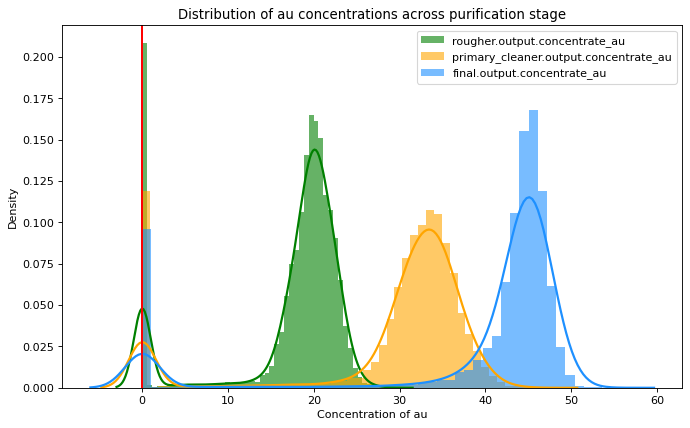

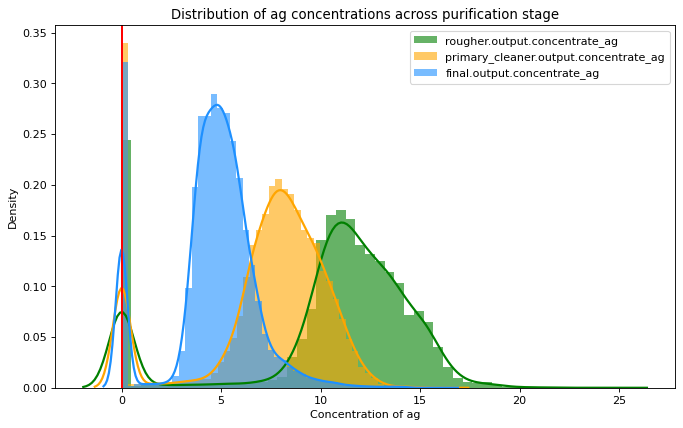

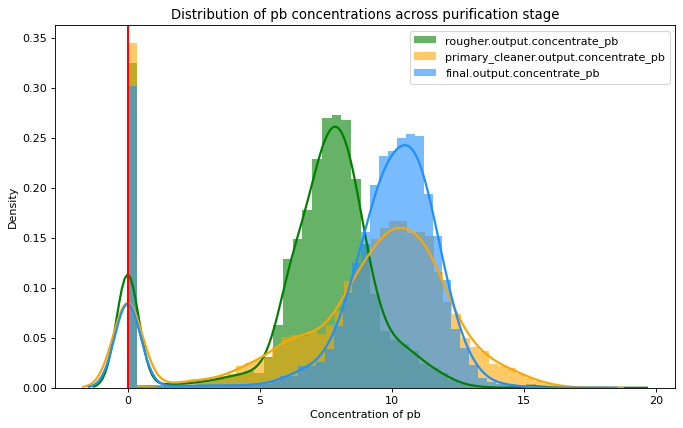

In [22]:
# distribution of concentration of metals in the training set
plot_distribution(gold_recovery_train)

**Conclusion**

The plots above shows the distribution of concentration of metals across purification stage. Looking at the plot, we observed that the concentration of gold (au) increased from the `rougher.output` to the `final.output`. This shows that the process is functioning as it suppose to. The concentration of the other metals decreased in the case of silver (ag) or remain almost the same like lead (pb).

#### Compare the feed particle size distributions in the training set and in the test set

In [23]:
# function to plot distribution of feed particle size
def plot_particle_size_distribution(df):
    kwargs = dict(hist_kws={'alpha': 0.5}, kde_kws={'linewidth':2})
    plt.figure(figsize=(10,6), dpi=80)
    for features, colour, labels in zip(input_feed, xcolors, xlabel_):
        sns.distplot(features, color=colour, label=labels, **kwargs)
        plt.axvline(0, c="r")
    plt.title('Feed particle size distribution for '+ [x.split('__', 1)[1] for x in xlabel_][0])
    plt.xlabel('Distribution of feed particle size')
    plt.legend();

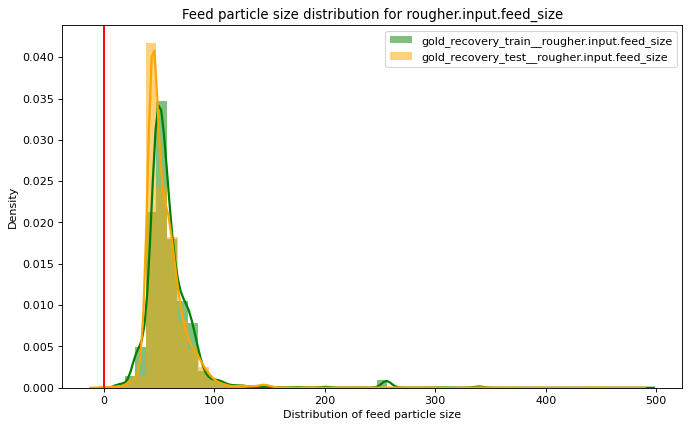

In [24]:
input_feed = [gold_recovery_train['rougher.input.feed_size'], gold_recovery_test['rougher.input.feed_size']]
xlabel_ = ['gold_recovery_train__rougher.input.feed_size', 'gold_recovery_test__rougher.input.feed_size']
xcolors = ['green', 'orange']

# distribution of feed particle size (rougher.input.feed_size)
plot_particle_size_distribution(gold_recovery_train)

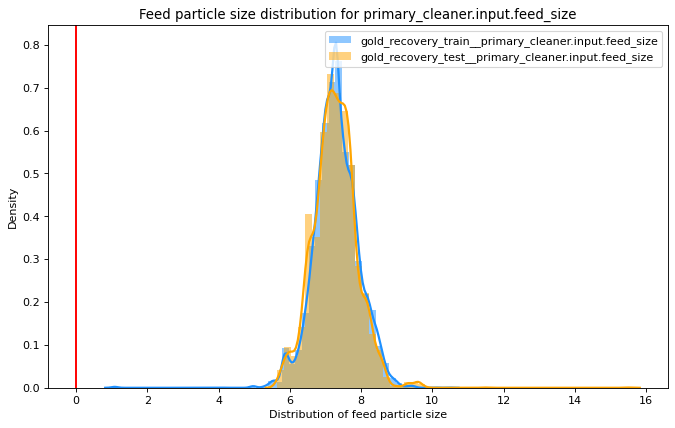

In [25]:
input_feed = [gold_recovery_train['primary_cleaner.input.feed_size'], gold_recovery_test['primary_cleaner.input.feed_size']]
xlabel_ = ['gold_recovery_train__primary_cleaner.input.feed_size', 'gold_recovery_test__primary_cleaner.input.feed_size']
xcolors = ['dodgerblue', 'orange']

# distribution of feed particle size (primary_cleaner.input.feed_size)
plot_particle_size_distribution(gold_recovery_test)

**Conclusion**

We compared the feed particle size distribution for the training and test dataset. We can also observe that the particle size distributions are similar. The distribution do not vary significantly hence we expect the model evaluation to be correct. This means that we can train the model on the train set and test model on the test set without any significant problem.

#### Check for anomalies in total concentrations of all substances at different stages

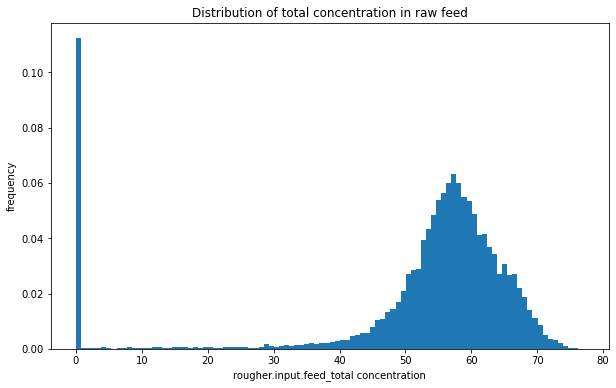

In [26]:
# rougher.input.feed in full dataset
gold_recovery_full['rougher.input.feed.total_concentration'] = gold_recovery_full[['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol', 'rougher.input.feed_au']].sum(axis=1)

# check for anomaly
total_conc_stage_1 = gold_recovery_full['rougher.input.feed.total_concentration']
plt.figure(figsize=(10,6))
plt.hist(total_conc_stage_1, density=True, bins=100)
# add title and axis names
plt.xlabel('rougher.input.feed_total concentration')
plt.ylabel('frequency')
plt.title("Distribution of total concentration in raw feed");

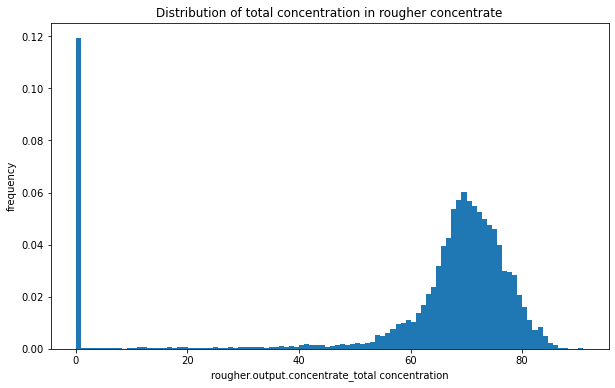

In [27]:
# rougher.output.concentrate in full dataset
gold_recovery_full['rougher.output.concentrate.total_concentration'] = gold_recovery_full[['rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.concentrate_au']].sum(axis=1)

# check for anomaly
total_conc_stage_2 = gold_recovery_full['rougher.output.concentrate.total_concentration']
plt.figure(figsize=(10,6))
plt.hist(total_conc_stage_2, density=True, bins=100)
# add title and axis names
plt.xlabel('rougher.output.concentrate_total concentration')
plt.ylabel('frequency')
plt.title("Distribution of total concentration in rougher concentrate");

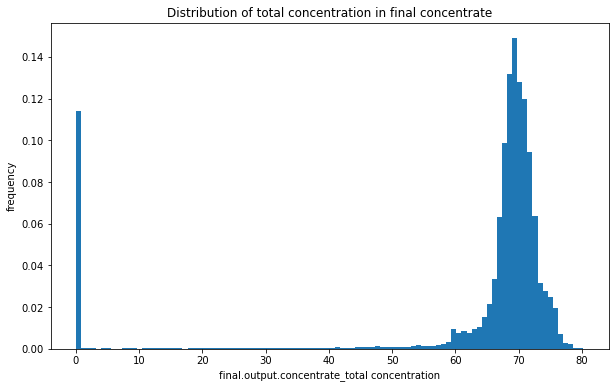

In [28]:
# final.output.concentrate in full dataset
gold_recovery_full['final.output.concentrate.total_concentration'] = gold_recovery_full[['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.concentrate_au']].sum(axis=1)

# check for anomaly
total_conc_stage_3 = gold_recovery_full['final.output.concentrate.total_concentration'] 
plt.figure(figsize=(10,6))
plt.hist(total_conc_stage_3, density=True, bins=100)
# add title and axis names
plt.xlabel('final.output.concentrate_total concentration')
plt.ylabel('frequency')
plt.title("Distribution of total concentration in final concentrate");

We sum the total concentrations of all substances at different stages in the process .i.e. the raw feed (`rougher.input.feed.total_concentration`), rougher concentrate(`rougher.output.concentrate.total_concentration`), and final concentrate(`final.output.concentrate.total_concentration`). We plotted a histogram and observed a peak in all three plots. This shows an anomaly in the data. It is strange to have total concentration around 0, so the peak is an abnormal value and we removed it by setting the threshold between 0.8 and 0.95.

In [29]:
# filtered full dataset without anomaly
gold_recovery_full_data = gold_recovery_full[(gold_recovery_full['rougher.input.feed.total_concentration'] > 0.8) & 
                                        (gold_recovery_full['rougher.output.concentrate.total_concentration'] > 0.95) & 
                                        (gold_recovery_full['final.output.concentrate.total_concentration'] > 0.8)]
print('The shape of the new dataset is: ', format(gold_recovery_full_data.shape))
print()
gold_recovery_full_data.describe()

The shape of the new dataset is:  (19904, 90)



,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.input.feed.total_concentration,rougher.output.concentrate.total_concentration,final.output.concentrate.total_concentration
count,19904.000000,19904.000000,19904.000000,19904.000000,19904.000000,19904.000000,19904.000000,19904.000000,19904.000000,19904.000000,...,19904.000000,19904.000000,19904.000000,19904.000000,19904.000000,19904.000000,19904.000000,19904.000000,19904.000000,19904.000000
mean,5.250317,10.005729,9.437927,44.024213,67.274249,9.722925,2.695731,10.405297,3.059586,143.984616,...,-461.784848,15.670516,-488.682801,12.217680,-487.183956,18.941251,-505.444267,57.056355,69.231266,68.718185
std,1.427628,1.575505,2.882103,4.686102,9.619950,2.396828,0.980749,3.041419,0.971711,45.810767,...,66.674388,5.510786,35.460418,5.307127,39.196781,5.541075,38.854243,7.863282,9.231440,6.498115
min,0.000000,0.135894,0.000000,0.225775,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464,0.913565,1.064979,0.835351
25%,4.278200,9.146978,7.629914,43.275641,63.350638,8.077092,2.023136,8.763196,2.463490,113.362840,...,-500.187016,10.988093,-500.458352,8.977880,-500.130066,14.983458,-500.739496,53.372708,66.195289,67.860212
50%,5.108484,10.105279,9.191454,44.936239,68.236471,9.809782,2.739593,10.527450,2.996648,143.095289,...,-499.473279,14.997593,-499.793222,11.021120,-499.934117,19.955170,-500.047765,57.549919,70.342238,69.554069
75%,5.952000,11.043546,10.969702,46.231796,72.741328,11.217990,3.344845,12.029298,3.588434,175.275803,...,-400.144280,18.025555,-498.348094,14.017480,-499.431386,23.991131,-499.481118,61.988720,74.598470,71.344193
max,16.001945,17.031899,19.615720,53.611374,100.000000,19.552149,6.086532,22.861749,9.789625,265.983123,...,-7.834746,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459,76.978947,90.964431,80.210644


In [30]:
# make date column the index in dataset
gold_recovery_test.set_index('date', inplace=True)
gold_recovery_train.set_index('date', inplace=True)
gold_recovery_full_data.set_index('date', inplace=True)

Now let's look for the index of the train set that can be found in the new full dataset. We use this new index to filter the `gold_recovery_full_data` for a new train dataset. This process will give us a train dataset without anomaly. We carry out similar operation for the test set too.

In [31]:
# index of train set in full dataset
gold_recovery_train_data_index = gold_recovery_full_data.index.intersection(gold_recovery_train.index)
gold_recovery_train_data_index.shape

(14614,)

In [32]:
# new train dataset
gold_recovery_train_data = gold_recovery_full_data.loc[gold_recovery_train_data_index]
gold_recovery_train_data.reset_index(inplace=True)
gold_recovery_train_data.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.input.feed.total_concentration,rougher.output.concentrate.total_concentration,final.output.concentrate.total_concentration
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,51.680034,66.424950,63.644396
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,50.659114,67.012710,63.957723
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,50.609929,66.103793,64.311180
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,51.061546,65.752751,63.573449
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,47.859163,65.908382,64.004667


In [33]:
# index of test set in full dataset
gold_recovery_test_data_index = gold_recovery_full_data.index.intersection(gold_recovery_test.index)
gold_recovery_test_data_index.shape

(5290,)

In [34]:
# new test dataset
gold_recovery_test_data = gold_recovery_full_data.loc[gold_recovery_test_data_index]
gold_recovery_test_data.reset_index(inplace=True)
gold_recovery_test_data.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.input.feed.total_concentration,rougher.output.concentrate.total_concentration,final.output.concentrate.total_concentration
0,2016-09-01 00:59:59,7.578381,10.466295,11.990938,40.743891,70.273583,12.688885,3.844413,11.075686,4.537988,...,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,72.871822,79.939838,70.779504
1,2016-09-01 01:59:59,7.813838,10.581152,12.216172,39.604292,68.910432,12.829171,3.918901,11.132824,4.675117,...,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,71.669225,81.118880,70.215454
2,2016-09-01 02:59:59,7.623392,10.424024,12.313710,40.724190,68.143213,12.977846,4.026561,10.990134,4.828907,...,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,73.202598,79.267044,71.085315
3,2016-09-01 03:59:59,8.552457,10.503229,13.074570,39.290997,67.776393,12.451947,3.780702,11.155935,4.969620,...,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987,70.757057,81.335254,71.421253
4,2016-09-01 04:59:59,8.078781,10.222788,12.475427,40.254524,61.467078,11.827846,3.632272,11.403663,5.256806,...,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333,68.654396,80.902631,71.031520


#### Conclusion

When we analyzed the distribution of concentration of metals across purification stage, we observed that the concentration of gold (au) increased from the `rougher.output` to the `final.output`. This indicated that the process is performing as designed. We compared the feed particle size distribution for the training and test dataset, and observed similar particle size distributions with little or no variation in the distribution. We checked for anomalies in total concentrations of all substances at different stages. We observed some anomaly in the data with an abnormal peak in total concentration at 0. We used a threshold between 0.8 and 0.95 to remove the anomaly. We used the index of train and test set to generate new train and test data without anomaly from the full dataset. Now our data is prepared and ready for model building.

<div id="build_the_model">
    <h2>Build the model</h2> 
</div>

We need to predict two values:
- rougher concentrate recovery `rougher.output.recovery`
- final concentrate recovery `final.output.recovery`

To do that, we build and train different models, and evaluate them using cross-validation. We use the `sMAPE` and `Final sMAPE` formulars as evaluation metrics. The sMAPE formular is given as:

\begin{equation}
    sMAPE = \frac{1}{N}\sum\limits_{i=1}^N\frac{\mid y_i-\hat{y_i}\mid}{\left(\mid y_i\mid + \mid \hat{y_i}\mid\right)/2} \times 100\%
\end{equation}

The Final sMAPE is calculated as:
\begin{equation}
    Final~sMAPE = 25\% \times sMAPE (rougher) + 75\% \times sMAPE (final)
\end{equation}

In [52]:
# function to compute the sMAPE
def smape(y_true, y_pred):
    smape = (np.abs(y_true - y_pred)/((np.abs(y_true) + np.abs(y_pred))/2)).mean()
    return smape

# function to calculate the final sMAPE value
def smape_final(y_true, y_pred):
    smape_out_rougher = smape(y_true[:,0], y_pred[:,0])
    smape_out_final =smape(y_true[:,1], y_pred[:,1])
    return (0.25 * smape_out_rougher) + (0.75 * smape_out_final)

# user-defined scoring function
smape_score = make_scorer(smape_final)

In [36]:
# declare variables for features and target
features_train = gold_recovery_train_data.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
features_test = gold_recovery_test_data.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
target_train = gold_recovery_train_data[['rougher.output.recovery', 'final.output.recovery']]
target_test = gold_recovery_test_data[['rougher.output.recovery', 'final.output.recovery']]

In [37]:
# features scaling
scaler = StandardScaler()
scaler.fit(features_train)
# transform the training set and the test set using transform()
features_train = scaler.transform(features_train)
features_test  = scaler.transform(features_test)

# target data as numpy array
target_train = target_train.values
target_test = target_test.values

#### Baseline model

In [53]:
# baseline model using a dummy regressor
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(features_train, target_train)
dummy_regr_test_predictions = dummy_regr.predict(features_test)

In [54]:
# evaluate baseline model
smape_final(target_test, dummy_regr_test_predictions)

0.08333189112826354

Looking at this, our baseline final sMAPE score is 8.33. Let's try to improve on this by training other algorithms. We develop other models and tune the hyperparameters accordingly.

#### Linear Regression Model

In [55]:
# build model
start_time = timeit.default_timer()
lr_regr = LinearRegression().fit(features_train, target_train) # train the model 
lr_regr_test_predictions = lr_regr.predict(features_test)

# cross-validation for linear model
cv_score = cross_val_score(lr_regr, features_train, target_train, cv=5, scoring=smape_score)
print('Mean smape:  {:.2%}'.format(cv_score.mean()))
print('sMAPE range of values are: ', cv_score)
print()
print('Execution time: ' + str((timeit.default_timer() - start_time)) + ' secs')

Mean smape:  4.55%
sMAPE range of values are:  [0.05368739 0.0354239  0.04233611 0.03860061 0.05745781]

Execution time: 0.26539490000141086 secs


In [56]:
# compute final smape for linear regression
print('The final sMAPE score is: {:.2%}'.format(smape_final(target_test, lr_regr_test_predictions)))

The final sMAPE score is: 3.07%


#### Random Forest Regression Model

Let's build the random forest regressor with and without hyperparameter tuning. For multi-label regression, we would use Decision trees, random forest, and gradient boosting algorithms as our machine learning models.

In [58]:
# build random forest regression model
start_time = timeit.default_timer()
rf_regr = RandomForestRegressor().fit(features_train, target_train) # train the model 
rf_regr_test_predictions = rf_regr.predict(features_test)

# cross-validation for random forest regression
cv_score_rf = cross_val_score(rf_regr, features_train, target_train, cv=5, scoring=smape_score)
print('Mean smape:  {:.2%}'.format(cv_score_rf.mean()))
print('sMAPE range of values are: ', cv_score_rf)
print()
print("Execution time: " + str((timeit.default_timer() - start_time)/60) + ' mins')

mean smape: 0.032766317588386155
sMAPE range of values are:  [0.05368739 0.0354239  0.04233611 0.03860061 0.05745781]

Execution time: 558.2004267000011 secs


In [59]:
# compute final smape for random forest
print('The final sMAPE score is: {:.2%}'.format(smape_final(target_test, rf_regr_test_predictions)))

The final sMAPE score is: 1.95%


##### Random forest with hyperparameter tuning

Using grid search to find the hyperparameters for the random forest algorithm, we have:

In [ ]:
start_time = timeit.default_timer()
# hyperparameter optimization

# define the model
regressor = RandomForestRegressor()
# define the cross-validation scheme
#folds = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define hyperparameters to tune
grid = {
    "n_estimators" : [10, 50, 100, 200, 500],
    "max_depth" : [2, 4, 8, 10, 12, 16],
    "min_samples_split" : [2, 4, 8, 16]
}
# define the grid search
grid_search_rf = GridSearchCV(estimator = regressor, param_grid = grid, 
                           n_jobs=-1, cv=5, scoring=smape_score)
# execute search
grid_search_rf.fit(features_train, target_train)
# summarize result
print('The best hyperparameters are: {:.3f}'.format(grid_search_rf.best_params_))
print()
print("Execution time: " + str((timeit.default_timer() - start_time)/60) + ' mins')

In [ ]:
# create the random forest regressor model
def random_forest_regressor(X_train, y_train, X_test, y_test):
    """
    This is a random forest regressor function developed to train
    the model, make prediction on testing dataset, 
    and compute evaluation metrics for testing datasets
    """
    # build the model
    model = RandomForestRegressor(**grid_search_rf.best_params_)
    model.fit(X_train, y_train) # train the model 
    # make predictions on testing set
    rf_test_predictions = model.predict(X_test)
    
    # compute final smape for random forest
    print('The final sMAPE is: {:.2%}'.format(smape_final(target_test, rf_test_predictions)))

In [ ]:
# determine final sMAPE for random forest regressor
random_forest_regressor(features_train, target_train, features_test, target_test)

We can see an increase in the final sMAPE score, but the execution time increased as well. The larger the grid to search, the more execution time it take for the algorithm to run. 

#### Gradient Boosting Regression Model

In [ ]:
# build gradient boosting regression model
start_time = timeit.default_timer()
gb_regr = GradientBoostingRegressor().fit(features_train, target_train) # train the model 
gb_regr_test_predictions = gb_regr.predict(features_test)

# cross-validation for gradient boosting regression
cv_score_gb = cross_val_score(gb_regr, features_train, target_train, cv=5, scoring=smape_score)
print('Mean smape:  {:.2%}'.format(cv_score_gb.mean()))
print('sMAPE range of values are: ', cv_score_gb)
print()
print("Execution time: " + str((timeit.default_timer() - start_time)/60) + ' mins')

In [ ]:
# compute final smape for gradient boosting
print('The final sMAPE is: {:.2%}'.format(smape_final(target_test, gb_regr_test_predictions)))

##### Gradient Boosting with hyperparameter tuning

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor

start_time = timeit.default_timer()
# hyperparameter optimization

# define the model
regressor = xgb.XGBRegressor()
# define the cross-validation scheme
#folds = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define hyperparameters to tune
params = {
    "n_estimators" : [10, 50, 100, 150, 200],
    "max_depth" : [2, 4, 8, 10, 12]
}
# define the grid search
grid_search_xgb = GridSearchCV(estimator = regressor, param_grid = params, 
                           n_jobs=-1, cv=5, scoring=smape_score)
# execute search
grid_search_xgb.fit(features_train, target_train)
# summarize result
print('The best hyperparameters are: {:.3f}'.format(grid_search_xgb.best_params_))
print()
print("Execution time: " + str((timeit.default_timer() - start_time)/60) + ' mins')

In [ ]:
# create the gradient boosting regression model
def gradient_boosting_regressor(X_train, y_train, X_test, y_test):
    """
    This is a XGBoost regressor function developed to train
    the model, make prediction on testing dataset, 
    and compute the evaluation metrics for testing datasets
    """
    # build the model
    xgb_model = xgb.XGBRegressor(**grid_search_xgb.best_params_)
    xgb_model.fit(X_train, y_train) # train the model 
    # make predictions on testing set
    xgb_test_predictions = xgb_model.predict(X_test)
    
    # compute final smape for gradient boosting regression
    print('The final sMAPE score is: {:.2%}'.format(smape_final(target_test, xgb_test_predictions)))

In [ ]:
# determine final sMAPE for gradient boosting regressor
gradient_boosting_regressor(features_train, target_train, features_test, target_test)

With the gradient boosting regressor, we obtained an sMAPE score of ---- using cross validation. When we tuned various hyperparameters, the sMAPE score `increased` to ---- showing that tuning the hyperparameters helps to achieve a better\worst sMAPE score. Looking at the time it takes to tune hyperparameters, the decision on whether to tune hyperparameters should be left to the Data Scientist depending on the cost requirement to tune, capacity and power of computing resources, and the expected result.

#### Decision Tree Regression model

In [ ]:
# build decision tree regression model
start_time = timeit.default_timer()
dt_regr = DecisionTreeRegressor().fit(features_train, target_train) # train the model 
dt_regr_test_predictions = dt_regr.predict(features_test)

# cross-validation for decision tree regression
cv_score_dt = cross_val_score(dt_regr, features_train, target_train, cv=5, scoring=smape_score)
print('Mean smape:  {:.2%}'.format(cv_score_dt.mean()))
print('sMAPE range of values are: ', cv_score_dt)
print()
print("Execution time: " + str((timeit.default_timer() - start_time)/60) + ' mins')

In [ ]:
# compute final smape for decision tree model
print('The final sMAPE score is: {:.2%}'.format(smape_final(target_test, dt_regr_test_predictions)))

##### Decision Tree with hyperparameter tuning

In [ ]:
start_time = timeit.default_timer()
# hyperparameter optimization

# define the model
dt_regressor = DecisionTreeRegressor()
# define the cross-validation scheme
#folds = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define hyperparameters to tune
params_ = {
    "max_depth" : [2, 4, 8, 16],
    "min_samples_split" : [2, 4, 8, 16]
    }
# define the grid search
grid_search_dt = GridSearchCV(estimator = dt_regressor, param_grid = params_, 
                           n_jobs=-1, cv=5, scoring=smape_score)
# execute search
grid_search_dt.fit(features_train, target_train)
# summarize result
print('The best hyperparameters are: {:.3f}'.format(grid_search_dt.best_params_))
print()
print("Execution time: " + str((timeit.default_timer() - start_time)/60) + ' mins')

In [ ]:
# create the decision tree regressor model
def decision_tree_regressor(X_train, y_train, X_test, y_test):
    """
    This is a decision tree regressor function developed to train
    the model, make prediction on testing dataset, 
    and compute evaluation metrics for testing datasets
    """
    # build the model
    dt_model = DecisionTreeRegressor(**grid_search_dt.best_params_)
    dt_model.fit(X_train, y_train) # train the model 
    # make predictions on testing set
    dt_test_predictions = dt_model.predict(X_test)
    
    # compute final smape for decision tree regressor
    print('The final sMAPE is: {:.2%}'.format(smape_final(target_test, dt_test_predictions)))

In [ ]:
# determine final sMAPE for decision tree regressor
decision_tree_regressor(features_train, target_train, features_test, target_test)

With the decision tree regressor, we obtained an sMAPE score of ---- using cross validation. When we tuned various hyperparameters, the sMAPE score increased to ---- showing that tuning the hyperparameters helps to achieve a better\worst sMAPE score. 

<div id="overall_conclusion">
    <h2>Overall conclusion</h2> 
</div>